In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib

In [17]:
fto = '/storage/experiments/2022/11_spacedos_power_test/ilog.log' #  File to Open

df = pd.read_csv(fto, header=None, skiprows=30)
df['time'] = df.index * (1/123)
df = df[:-5]
df[0] = df[0].astype(float)

/tmp/ipykernel_6436/2443356436.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fto, header=None, skiprows=30)


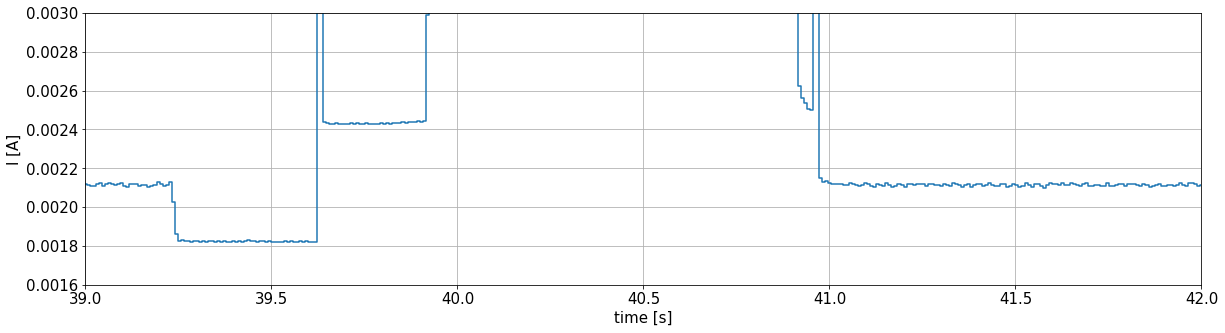

In [35]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['time'], df[0], drawstyle='steps-mid')
#plt.xlim(39,58)
plt.xlim(39,42)
plt.ylim(0.0016,0.003)
plt.xlabel('time [s]')
plt.ylabel('I [A]')
plt.grid()

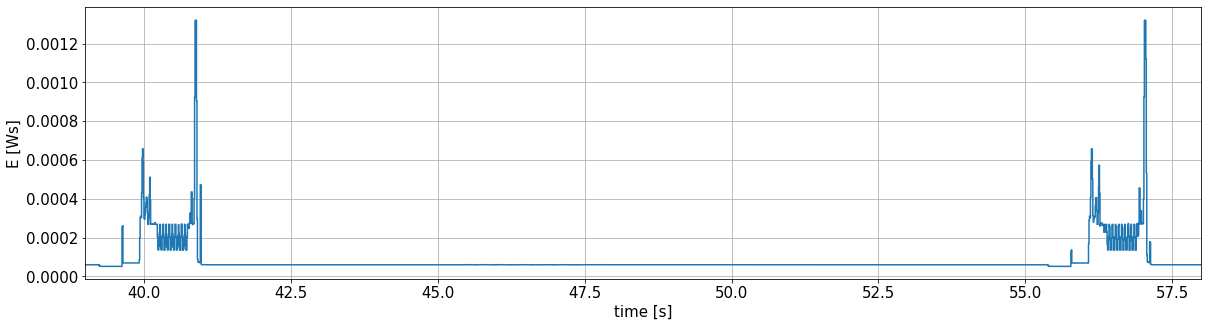

In [14]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['time'], df[0]*3.5*(1/123), drawstyle='steps-mid')
plt.xlim(39,58)
plt.xlabel('time [s]')
plt.ylabel('E [Ws]')
plt.grid()

In [87]:
xx = df.loc[df['time']>40.97].loc[df['time']<57.138].copy()
xx['energy'] = xx[0]*3.5*(1/123)

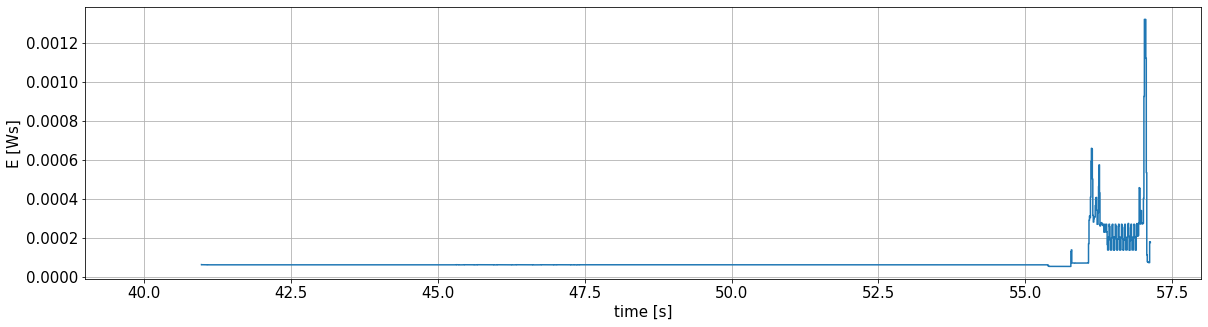

In [88]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(xx['time'], xx['energy'], drawstyle='steps-mid')
plt.xlim(39,58)
plt.xlabel('time [s]')
plt.ylabel('E [Ws]')
plt.grid()

In [107]:
energy_one_measurement = xx['energy'].sum()
time_one_measurement = xx['time'].iloc[-1]-xx['time'].iloc[-0]
energy_battery = 61*60*60  # Ws

In [108]:
endurance = (energy_battery / energy_one_measurement) * time_one_measurement  # s


In [112]:
print('one measurement', energy_one_measurement, 'Ws')
print('one measirement', time_one_measurement, 's') 
print('endurance', endurance / 60 / 60 / 24 / 30.4 * 0.78, 'months')   # months

one measurement 0.14884157950666668 Ws
one measirement 16.154471544715456 s
endurance 7.07795990196531 months


In [114]:
time_one_measurement * 5500 /60/60

24.680442637759725

In [115]:
365/2

182.5